- Given a randomly generated bit string of length 100, create a genetic algorithm that 
through mutation tries to obtain a string containing only 1s, i.e., 111111...111111. 
- Implement a fitness function that rewards strings containing more 1s, e.g., a counter. 
- Decide initial values for the following parameters and implementation choices for your 
algorithm: population size, mutation rate, selection/reproduction criteria, number of 
generations. 
- Execute  your  algorithm  for  at  least  30  independent  runs  and  collect  statistics. 
Generate fitness plots over the generations for your statistics (best, avg, deviation)      
- Systematically  change  your  parameters  (population  size,  mutation  rate)  and/or 
choices for selection/reproduction criteria. Does your algorithm still converge to the 
global optima? Does it need more or less generations to converge?  
- Try to change the length of the randomly generated string to 10 bits and 1000 bits (or 
more). What do you observe? 
- Discuss and explain your results. 

V2:
1. We have added additional roulette wheel selection criteria
2. We have added single point crossover.

# Task 1 - Given a randomly generated bit string of length 100, create a genetic algorithm that through mutation tries to obtain a string containing only 1s, i.e., 111111...111111.

# Task 3 - Decide initial values for the following parameters and implementation choices for your algorithm: population size, mutation rate, selection/reproduction criteria, number of generations.

In [379]:
population_size = 8
elite_individuals = 1
tournament_selection_size = 4
mutation_rate = 0.25
target_individual = [1,1,1,1,1,1,1,1,1,1]
gene_pool = [0,1]
crossover_point = 4

# Task 2 - Implement a fitness function that rewards strings containing more 1s, e.g., a counter.

In [380]:
# Chromosomes contains array of genes and fitness of the chromosome
# Genes are generated randomly.
# Fitness is based on the ability to determine whether the genes at the specific
#  index match with the target chromosome's genetic at the same index.
import random

class Individual:
  def __init__(self):
    self._genes = []
    self._fitness = 0
    i = 0
    while i < target_individual.__len__():
      if random.random() >= 0.5:
        self._genes.append(1)
      else:
        self._genes.append(0)
      i += 1
    
  def get_genes(self):
    return self._genes
  
  def get_fitness(self):
    self._fitness = 0
    for i in range(self._genes.__len__()):
      if self._genes[i] == target_individual[i]:
        self._fitness += 1
    return self._fitness
  
  def __str__(self):
    return self._genes.__str__()

In [381]:
# Population is the list of chromosomes.

class Population:
  def __init__(self, size):
    self._individuals = []
    for _ in range(0, size):
      self._individuals.append(Individual())
  
  def get_individuals(self):
    return self._individuals


In [382]:
from statistics import mean, stdev

def _print_population(pop, gen_number):
  print("------------------------------------------------------")
  print("GENERATION Number : ", gen_number)
  print("BEST Individual FITNESS : ", pop.get_individuals()[0].get_fitness() )
  print("TARGET Individuals : ", target_individual)
  print("BEST Individuals : ", pop.get_individuals()[0])
  print("-----------------------------------------------------")
  i = 0 
  fitness_list = []
  for x in pop.get_individuals():
    # print("Individual #", i, " : ", x, " | Fitness: ", x.get_fitness())
    i += 1
    fitness_list.append(x.get_fitness())
  # print("Best Fitness : ",pop.get_individuals()[0].get_fitness() )
  meann = mean(fitness_list)
  st_deviation = stdev(fitness_list)
  print("Average Fitness : ", meann)
  print("standard deviation of fitness : ", st_deviation)
  return (meann, st_deviation)

In [383]:

class GeneticAlgorithm:
  @staticmethod
  def evolve(population, selection_criteria, crossover_type):
    return GeneticAlgorithm._mutate_population(GeneticAlgorithm._crossover_population(population, selection_criteria, crossover_type))
  

  # mutating and returning the population
  @staticmethod
  def _mutate_population(pop):
    for i in range(elite_individuals):
      GeneticAlgorithm._mutate_individual(pop.get_individuals()[i])
    return pop

# one elite individual and rest(7) are crossover.
  @staticmethod
  def _crossover_population(pop, selection_criteria, crossover_type):

    # empty population
    crossover_pop = Population(0)
    
    # elite_individuals = 1
    # get one individual from population
    for i in range(elite_individuals):
      crossover_pop.get_individuals().append(pop.get_individuals()[i])

    i = elite_individuals
    while i < population_size:
      # Get individuals(sorted by fitness) on the basis of tournament_selection_size
      # and the individual with the highest fitness are selected for individual 1
      # and individual2

      if(selection_criteria == "TOURNAMENT"):
        individual1 = GeneticAlgorithm._select_tournament_population(pop).get_individuals()[0]
        individual2 = GeneticAlgorithm._select_tournament_population(pop).get_individuals()[0]

      else:
        # Roulette wheel
        individual1 = GeneticAlgorithm._select_roulette_wheel(pop).get_individuals()[0]
        individual2 = GeneticAlgorithm._select_roulette_wheel(pop).get_individuals()[0]


      if(crossover_type == "UNIFORM"): 
        crossover_pop.get_individuals().append(GeneticAlgorithm._crossover_individuals_uniform(individual1, individual2))
      else:
        crossover_pop.get_individuals().append(GeneticAlgorithm._crossover_individuals_using_single_point_crossover(individual1, individual2))

      i += 1
    
    return crossover_pop


  # uniform crossover
  @staticmethod
  def _crossover_individuals_uniform(individual1, individual2):
    crossover_indv = Individual()
    for i in range(target_individual.__len__()):
      if random.random() >= 0.5:
        crossover_indv.get_genes()[i] = individual1.get_genes()[i]
      else:
        crossover_indv.get_genes()[i] = individual2.get_genes()[i]
    return crossover_indv

# Single point cross over
  @staticmethod
  def _crossover_individuals_using_single_point_crossover(individual1, individual2):
    crossover_indv = Individual()
    for i in range(target_individual.__len__()):
      if i <= crossover_point:
        crossover_indv.get_genes()[i] = individual1.get_genes()[i]
      else:
        crossover_indv.get_genes()[i] = individual2.get_genes()[i]
    return crossover_indv


# mutation_rate = 0.25
# the rate should be less in value, this is for the test purpose
# mutation is a background operator whose is used to prevent the algorithm from 
# prematurely converging to a suboptimal solution

# mutating the individual
  @staticmethod
  def _mutate_individual(individual):
    for i in range(target_individual.__len__()):

      if random.random() < mutation_rate:
        if random.random() < 0.5:
          individual.get_genes()[i] = 1
        else:
          individual.get_genes()[i] = 0

  
# tournament_selection_size = 4
# return randomly select 4 individuals from the population after 
# sorting them by fitness
  @staticmethod
  def _select_tournament_population(pop):
    # empty population
    tournament_pop = Population(0)
    i = 0

    # randomly select four sets of individual
    while i < tournament_selection_size:
      tournament_pop.get_individuals().append(pop.get_individuals()[random.randrange(0, population_size)])
      i += 1
    
    # sort by descending order 
    tournament_pop.get_individuals().sort(key=lambda x: x.get_fitness(), reverse = True)
    return tournament_pop


  @staticmethod
  def _select_roulette_wheel(pop):
    population = Population(0)
    roulette_wheel_result = -1
    total_sum = 0
    total_sum = sum([(total_sum + c.get_fitness()) for c in pop.get_individuals()])
    random_num = random.randrange(0,total_sum)
    partial_sum = 0
    for c in pop.get_individuals():
      partial_sum += c.get_fitness()
      if(partial_sum >= random_num):
        population.get_individuals().append(c)
        break;
    return population;


# Task 4 - Execute your algorithm for at least 30 independent runs and collect statistics. Generate fitness plots over the generations for your statistics (best, avg, deviation)

In [384]:
each_run_average = []
each_run_stdev = []



for i in range(30):
  generations_average_for_a_run = [] 
  generations_stdev_for_a_run = []
  population = Population(population_size)
  population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
  stats = _print_population(population, 0)
  generations_average_for_a_run.append(stats[0])
  generations_stdev_for_a_run.append(stats[1])
  generation_number = 1
  

  while population.get_individuals()[0].get_fitness() < target_individual.__len__():
    population = GeneticAlgorithm.evolve(population, "TOURNAMENT", "SINGLE_POINT")
    population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
    stats = _print_population(population, generation_number)
    generations_average_for_a_run.append(stats[0])
    generations_stdev_for_a_run.append(stats[1])
    generation_number += 1

  print("generations_average_for_a_run : ", generations_average_for_a_run) 
  each_run_average.append(mean(generations_average_for_a_run))
  print("STANDARD DEVIATION : ", each_run_stdev)
  each_run_stdev.append(stdev(generations_stdev_for_a_run))
print("Average of all run ", each_run_average)
print("standard deviation of all run ", each_run_stdev)

Streaming output truncated to the last 5000 lines.
BEST Individual FITNESS :  9
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
-----------------------------------------------------
Average Fitness :  8.75
standard deviation of fitness :  0.7071067811865476
------------------------------------------------------
GENERATION Number :  53
BEST Individual FITNESS :  9
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
-----------------------------------------------------
Average Fitness :  9
standard deviation of fitness :  0.0
------------------------------------------------------
GENERATION Number :  54
BEST Individual FITNESS :  9
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
-----------------------------------------------------
Average Fitness :  8.625
standard deviation of fitness :  1.0606601717798212
-------------------

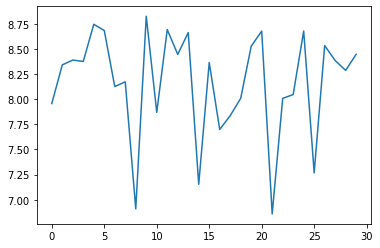

In [385]:
import matplotlib.pyplot as plt
tournament_sdv=each_run_stdev 
touranment_list = each_run_average
plt.plot(touranment_list)

In [386]:
each_run_average = []
each_run_stdev = []



for i in range(30):
  generations_average_for_a_run = [] 
  generations_stdev_for_a_run = []
  population = Population(population_size)
  population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
  stats = _print_population(population, 0)
  generations_average_for_a_run.append(stats[0])
  generations_stdev_for_a_run.append(stats[1])
  generation_number = 1
  

  while population.get_individuals()[0].get_fitness() < target_individual.__len__():
    population = GeneticAlgorithm.evolve(population, "ROULETTE", "SINGLE_POINT")
    population.get_individuals().sort(key=lambda x: x.get_fitness(), reverse= True)
    stats = _print_population(population, generation_number)
    generations_average_for_a_run.append(stats[0])
    generations_stdev_for_a_run.append(stats[1])
    generation_number += 1

  print("generations_average_for_a_run : ", generations_average_for_a_run) 
  each_run_average.append(mean(generations_average_for_a_run))
  print("STANDARD DEVIATION : ", each_run_stdev)
  each_run_stdev.append(stdev(generations_stdev_for_a_run))
print("Average of all run ", each_run_average)
print("standard deviation of all run ", each_run_stdev)

Streaming output truncated to the last 5000 lines.
------------------------------------------------------
GENERATION Number :  3
BEST Individual FITNESS :  8
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
-----------------------------------------------------
Average Fitness :  6.25
standard deviation of fitness :  1.3887301496588271
------------------------------------------------------
GENERATION Number :  4
BEST Individual FITNESS :  8
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
-----------------------------------------------------
Average Fitness :  6.875
standard deviation of fitness :  0.9910312089651149
------------------------------------------------------
GENERATION Number :  5
BEST Individual FITNESS :  8
TARGET Individuals :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
BEST Individuals :  [0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
-----------------------------------------------------
A

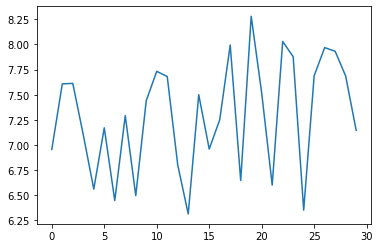

In [387]:
roulette_sdv=each_run_stdev 
roulette_list = each_run_average
plt.plot(roulette_list)

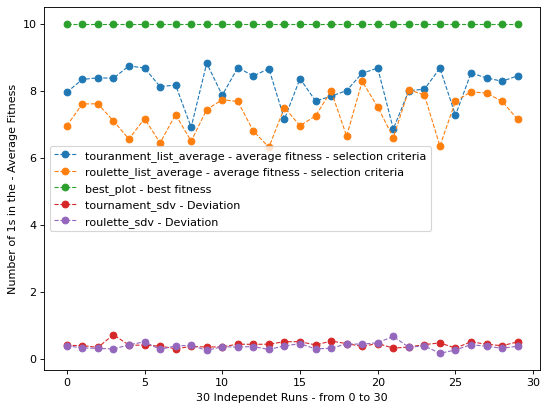

In [388]:
# plt.legend(['touranment_list'])
# plt.plot(touranment_list)
# plt.legend(['roulette_list'])
# plt.plot(roulette_list)
import numpy as np # just used for ones
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
y = [0,1,2,3,4,5,6,7,8,9,10]
best_plot = list(np.ones(30)*10)

# Average Fitness (Roulette and Tournament)
plt.plot(touranment_list, 'o--', label='touranment_list_average - average fitness - selection criteria',linewidth=1)
plt.plot(roulette_list, 'o--', label='roulette_list_average - average fitness - selection criteria',linewidth=1)

# Best Fitness
plt.plot(best_plot, 'o--', label='best_plot - best fitness',linewidth=1)

# Deviation (Roulette and Tournament)
# tournament_sdv
# roulette_sdv
plt.plot(tournament_sdv, 'o--', label='tournament_sdv - Deviation',linewidth=1)
plt.plot(roulette_sdv, 'o--', label='roulette_sdv - Deviation',linewidth=1)


plt.xlabel("30 Independet Runs - from 0 to 30")
plt.ylabel("Number of 1s in the - Average Fitness")

plt.legend()

# Task 5: Systematically change your parameters (population size, mutation rate) and/or choices for selection/reproduction criteria. Does your algorithm still converge to the global optima? Does it need more or less generations to converge?

# Response to task 5: We have changed sleection criteria for selection criteria as Tournament and Roulette selections! Please check the previous plot generated. Now from here we will change population size and mutation rate to play around and see the graphs and add these plots to graphs!

# **Separate Notebook! ⚠**